# Mod 1 Project - Arman, Paul, Jonny

__Objectives:__
- Our first girl is to create a map the establishes a border between south king county cities and the rest of the cities.
    - Based on documentation, we know that the cities in south county include: __Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, and Vashon Island.__
    - We used this website as a referrence: https://www.kingcounty.gov/depts/health/data/community-health-indicators/definitions.aspx
    - we know there are two zip codes that overlap north and south: (98056, 98059).
    - 98056 is assigned to south and 98059 is assigned to east so we will disclude this one.
- We then need to establish a definition for Opportunity Youth and query our database based on this definition.
    - Our definition is __young folks between the age 16 through 24 who are disengaged from both work and school__


# Creating our Map:

List of the libraries and modules we will import and use for this project:

In [55]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
from IPython.display import Image

we will be doing all of our queries in postico and exporting them here

## Establish the mapping parameters:

We will begin by establishing a border around the entire washington

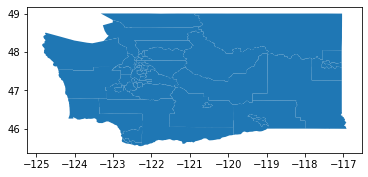

In [2]:
# Import Washington PUMA Data with GeoPandas Shape data in Geometry column 
wa_puma = gpd.read_file("../../data/raw/tl_2017_53_puma10.shp") 

# Converts PUMACE10 Column from string to integer since we are reading directly from the file and not through pandas (pandas would have done this conversion automatically)
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)
wa_puma.loc[:,'GEOID10'] = wa_puma['GEOID10'].astype(int)

wa_puma.plot() # can add additional code beyond this line to the object to make it prettier, but not needed right now in this stage.
plt.show() # runs the object in its whole

## __Establishing south king county parameters:__ 
We queried out a list of puma id's that based off their description we consider to be south 
 - we used the government website as a reference point: https://www.ofm.wa.gov/washington-data-research/population-demographics/gis-data/census-geographic-files/supplemental-information-gis-files/public-use-microdata-area-maps<br>

We ran this query in sequal in order to define the south king county parameters. We will use the list of puma id values as a filter for creating our maps borders.

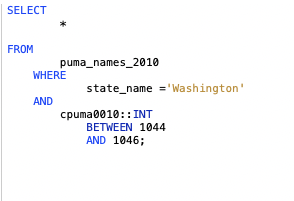

In [3]:
Image('../../img_files/puma_id_query.png')

In [4]:
# import postico query we ran to filter out the state to washington to show all of king county's puma id's 
df_puma_id = pd.read_csv('../queries/Puma_Ids.csv') 

In [5]:
# We were able to query out all of king county's puma's and ran into an issue with further querying it by south puma names
# inside of our software so we will take just one extra step with pandas to query out our southern puma's
# we referenced a map on puma locations found on: https://www.ofm.wa.gov/washington-data-research/population-demographics/gis-data/census-geographic-files/supplemental-information-gis-files/public-use-microdata-area-maps
# to understand that some puma locations described as west, central still included south county cities.
# We included 
df_south_pumas = df_puma_id.sort_values('puma').query('puma_name.str.contains("South") and puma!= 11606 or puma==11610 or puma==11611')
df_south_pumas

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."
10,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."


In [6]:
# We utilized the loc function to define that we want all rows ':' and only the column puma and created it as a list to be able to refer to
# later in order to paint our borders
skc_puma_list= list(df_south_pumas.loc[:, 'puma'])
skc_puma_list

[11610, 11611, 11612, 11613, 11614, 11615]

In [7]:
# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

# Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country/S. Seattle, or 0 otherwise. This is
# used to map the gray portion of the figure
skc_puma = kc_puma.assign(SKC = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']])

In [8]:
skc_puma.head(2) # we will use this to allow geopandas to draw our south county border

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,SKC
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0


## The Map end product:

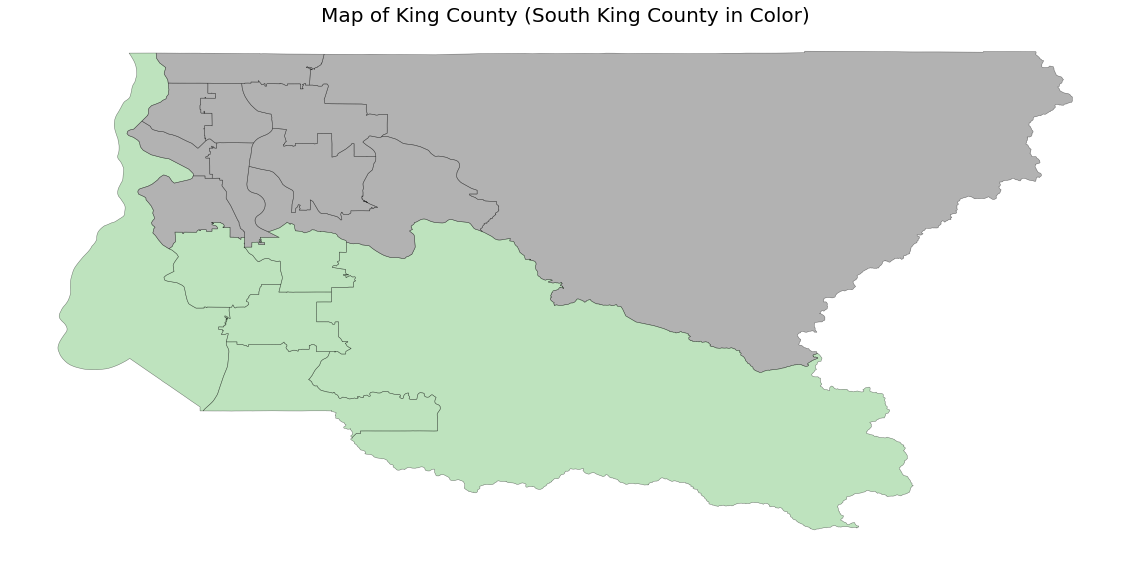

In [9]:
# Plots a map of King County, with South King County and South Seattle in color
fig, ax = plt.subplots(1, figsize=(20, 16))
ax = skc_puma.plot(ax=ax, 
              column='SKC', cmap='Accent_r', alpha = .5, linewidth=.5, edgecolor='black',  legend = False)
ax.set_title('Map of King County (South King County in Color)', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();

# What is considered opportunity youth?

opportunity youth is classified as: young people between the age 16 through 24 who are disengaged from both work and school. In particular, we want these youth who are within the south county borders.<br>
To meet the guidelines of these parameters, we have run some queries on a few tables.

__Preface:__ <br>
*due to postico technical difficulties, we could not fully query out what we needed so we did what postico would allow us to do and then we will proceed to finish off the querying and cleaning in pandas.*

This was what our query syntax looked like:

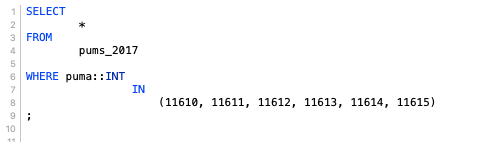

In [10]:
Image('../../img_files/pums_2017_south_county.png') # filtered based on puma's to get only the south king county cities

In [11]:
skc_puma_list

[11610, 11611, 11612, 11613, 11614, 11615]

In [12]:
# we read the exported sql query we made with pandas in order to query further with pandas
df_oy_no_age = pd.read_csv('../queries/pums_2017_based_on_puma.csv')
df_opportunity_youth_south_county= df_oy_no_age.query('(agep > 15 and agep < 25) and (sch == 1) and (esr == 3 or esr == 6)').loc[:, ['puma','agep','esr', 'sch', 'schl']]
df_opportunity_youth_south_county['sch'].replace(1, "not in school", inplace=True)
df_opportunity_youth_south_county['esr'].replace((3,6),('unemployed','not in labor force'), inplace=True)

# need to filter esr
df_opportunity_youth_south_county.sort_values('puma')

,puma,agep,esr,sch,schl
8161,11610,19,not in labor force,not in school,19.0
2535,11610,22,not in labor force,not in school,5.0
24768,11610,18,not in labor force,not in school,16.0
24554,11610,20,not in labor force,not in school,18.0
24241,11610,23,not in labor force,not in school,16.0
...,...,...,...,...,...
20980,11615,20,not in labor force,not in school,16.0
3204,11615,19,unemployed,not in school,16.0
21185,11615,24,unemployed,not in school,15.0
3059,11615,22,not in labor force,not in school,19.0


In [13]:
print('Number of opportunity youth in south king county =', len(df_opportunity_youth_south_county))

Number of opportunity youth in south king county = 391


# Updated Descriptive statistics on OY 2016 report

1. An update of the table “Opportunity Youth Status by Age” located on page 2 of the 2016 report “Opportunity Youth in the Road Map Project Region”; and

2. A visualization that highlights a trend between the 2016 report and current data.

Our goal is to update this table with our 2019 data:

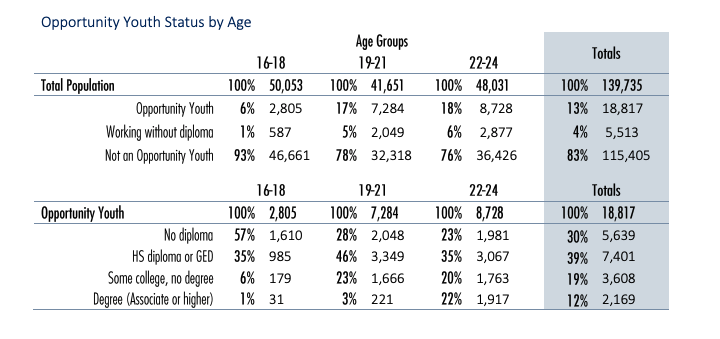

In [14]:
Image("../../img_files/OY_2016_report.png")

In [15]:
# This data set we queryed from postico and only limited it by puma ID to ensure it 
# that only covers individuals who are apart of south king county
df_pums = pd.read_csv('../queries/pums_2017_based_on_puma.csv') 
df_pums

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2017000258049,9,1,11611,4,53,1011189,13,34,...,12,20,4,12,5,3,12,4,22,16
1,P,2017000258049,9,2,11611,4,53,1011189,12,36,...,12,22,4,12,3,4,12,3,22,14
2,P,2017000258049,9,3,11611,4,53,1011189,13,6,...,13,22,5,12,5,4,13,5,24,14
3,P,2017000258049,9,4,11611,4,53,1011189,14,3,...,14,20,4,17,5,4,15,5,28,18
4,P,2017000258267,9,1,11611,4,53,1011189,11,29,...,3,4,19,18,3,13,21,3,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,P,2016001467113,9,2,11610,4,53,1029257,21,58,...,38,24,20,6,6,36,22,20,22,32
34141,P,2016001468478,9,1,11610,4,53,1029257,16,55,...,24,5,15,5,15,16,6,16,5,16
34142,P,2016001468478,9,2,11610,4,53,1029257,19,54,...,31,5,17,7,18,23,6,21,6,20
34143,P,2016001468478,9,3,11610,4,53,1029257,15,24,...,24,5,14,4,14,15,4,14,4,16


## Working without a diploma:

In [16]:
# To determine this category we queryed based on the age ranges needed 16-24.
# We then queryed based on employment status being true by accepting all esr values that don't include 3 or 6
# We finalized by setting our schl to query out not having a diploma. We defined that as college diploma so highschool diploma's are still included in the sample.
df_working_without_diploma = df_pums.loc[:,['puma','agep','esr', 'sch','schl']].query('(agep>15 and agep<25) and (esr!=3 and esr!=6) and (schl>1 and schl<16)')
df_working_without_diploma

,puma,agep,esr,sch,schl
347,11614,23,1.0,1.0,15.0
579,11614,20,1.0,1.0,14.0
749,11610,23,1.0,1.0,13.0
841,11611,19,1.0,2.0,13.0
1197,11613,21,1.0,1.0,15.0
...,...,...,...,...,...
33599,11615,18,1.0,2.0,14.0
33759,11614,18,1.0,2.0,14.0
33824,11614,24,1.0,1.0,12.0
34047,11614,24,1.0,1.0,15.0


## Not part of Opportunity Youth:

### Group 1 

In [17]:
# To create this categorical sample, we set our age boundaries 16-24
# Then we had to create two groups that qualify as not part of opportunity youth
# Group 1 are the ones who are in school but not employed 
# Group 2 are the ones who are employed and not in school
# These are the only two potential categories that can exist to disqualify someone from Opportunity Youth based on our selected age ranges
df_group1= df_pums.loc[:,['puma','agep','esr', 'sch','schl']].query('(agep>15 and agep<25) and (esr==6 or esr==3) and (sch!=1)')
df_group1.reset_index(drop=True).sort_values('agep')

,puma,agep,esr,sch,schl
583,11614,16,6.0,2.0,16.0
470,11611,16,6.0,2.0,12.0
469,11615,16,6.0,2.0,13.0
467,11612,16,6.0,2.0,12.0
1191,11615,16,6.0,2.0,13.0
...,...,...,...,...,...
1237,11610,24,6.0,2.0,19.0
1245,11615,24,6.0,3.0,21.0
565,11615,24,6.0,3.0,19.0
982,11612,24,6.0,2.0,19.0


### Group 2

In [18]:
# Group 2 are the ones who are employed and not in school
df_group2= df_pums.loc[:,['puma','agep','esr', 'sch','schl']].query('(agep>15 and agep<25) and (sch==1) and (esr!=6 or esr!=3)')
df_group2.reset_index(drop=True).sort_values('agep')

,puma,agep,esr,sch,schl
582,11614,16,6.0,1.0,12.0
350,11613,16,6.0,1.0,15.0
1088,11614,16,6.0,1.0,13.0
1114,11614,16,6.0,1.0,13.0
1303,11611,16,1.0,1.0,19.0
...,...,...,...,...,...
448,11610,24,1.0,1.0,16.0
1033,11612,24,6.0,1.0,16.0
449,11612,24,6.0,1.0,16.0
1233,11611,24,1.0,1.0,21.0


### Group 1 and 2 combined

In [19]:
# The concat method will literally put both tables ontop of each other this is perfect since all the columns are the same
all_dfs = [df_group1, df_group2]

# Give all df's common column names
for df in all_dfs:
    df.columns = ['puma', 'agep', 'esr', 'sch', 'schl']

df_not_oy = pd.concat(all_dfs).sort_values('agep').reset_index(drop=True)

In [20]:
print("There are:", len(df_not_oy),"people not classified as Opportunity Youth")

There are: 2803 people not classified as Opportunity Youth


# Seperating Age groups: 16-18, 19-21, 22-24

### working without a diploma 16-18 group:

In [21]:
# We will make an aggregation of this table in order to sum up age categories of people
# Who do not have a diploma but are working
# Our categories will be: 16-18, 19-21, 22-24
df_working_without_diploma.head()

,puma,agep,esr,sch,schl
347,11614,23,1.0,1.0,15.0
579,11614,20,1.0,1.0,14.0
749,11610,23,1.0,1.0,13.0
841,11611,19,1.0,2.0,13.0
1197,11613,21,1.0,1.0,15.0


In [22]:
# After aggregating each age category we need to group the catergories 
df_working_without_diploma_age_breakdown = df_working_without_diploma.sort_values('agep').groupby('agep').agg(sum_of_ages=('agep', 'count')).reset_index()
df_working_without_diploma_age_breakdown

,agep,sum_of_ages
0,16,56
1,17,73
2,18,58
3,19,17
4,20,24
5,21,15
6,22,17
7,23,24
8,24,15


In [53]:
# to create a seperate column with a list of labels with age ranges, we will use the pd.cut method and define our labels for those ages
# we set the age ranges by using a list of numbers that act as boundary points
# 15,18 - means dont include 15 but do include all the numbers between, including 18, so: 16-18
# 18,21 - means don't include 18 but do include all the numbers between including 21, so: 18-21
# 21,24 - means don't include 21 but do include all the numbers between including 24, so: 22-24

df_working_without_diploma['agep_categories'] = pd.cut(df_working_without_diploma['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])


In [24]:
# We then proceeded to aggregate our categories using the group by and agg functions
# We are required to reset our index to keep everything in better order.
df_age_categories= df_working_without_diploma.groupby('agep_categories').agg(age_totals=('agep', 'count'))
df_age_categories.reset_index(inplace=True)
df_age_categories

,agep_categories,age_totals
0,16-18,187
1,19-21,56
2,22-24,56


### Final table segment:

In [54]:
# We then created a total row at the bottom to give it a somewhat microsoft excel look
# We did this by appending  a summation of our above rows to the dataframe
# Since it is an append it will always be at the bottom of the list since a dataframes columns are technically lists
# The summation attempts to sum our agep_categories column and fails since its not an int or float so it returns a NaN value
# This is perfect as we can just fill that NaN value with Total to better visualize our goal

df_age_cat_total= df_age_categories.append(df_age_categories.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_age_cat_total.fillna('Total:')

,agep_categories,age_totals
0,16-18,187.0
1,19-21,56.0
2,22-24,56.0
3,Total:,299.0


# Seperating no OY group ages: 16-18, 19-21, 22-24

Our next goal is to segregate our non opportunity youth candidates into our established age ranges.

In [26]:
df_not_oy

,puma,agep,esr,sch,schl
0,11614,16,6.0,2.0,13.0
1,11610,16,6.0,2.0,13.0
2,11610,16,6.0,2.0,13.0
3,11610,16,6.0,2.0,13.0
4,11611,16,6.0,3.0,12.0
...,...,...,...,...,...
2798,11610,24,3.0,1.0,21.0
2799,11613,24,1.0,1.0,18.0
2800,11613,24,1.0,1.0,19.0
2801,11610,24,1.0,1.0,17.0


In [27]:
# grouping this set by age:

df_not_oy_age_totals= df_not_oy.groupby('agep').agg(sum_of_ages = ('agep', 'count')).reset_index()
df_not_oy_age_totals

,agep,sum_of_ages
0,16,427
1,17,374
2,18,270
3,19,226
4,20,285
5,21,254
6,22,297
7,23,327
8,24,343


In [28]:
# now to section them by age groups:
df_not_oy['agep_categories'] = pd.cut(df_not_oy['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])

df_not_oy_ages_sumed= df_not_oy.groupby('agep_categories').agg(age_totals=('agep', 'count'))
df_not_oy_ages_sumed.reset_index(inplace=True)
df_not_oy_ages_sumed

,agep_categories,age_totals
0,16-18,1071
1,19-21,765
2,22-24,967


### Final table segment:

In [29]:
# now to add a total column
df_not_oy_total= df_not_oy_ages_sumed.append(df_not_oy_ages_sumed.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_not_oy_total.fillna('Total:')

,agep_categories,age_totals
0,16-18,1071.0
1,19-21,765.0
2,22-24,967.0
3,Total:,2803.0


# Opportunity youth : 
These values provided by our documentation will help us define each of these parameters:
1. no diploma is defined as: `schl = 15`
2. hs diploma  or GED is defined as: `schl = 16 and 17`
3. some college, no degree is defined as: `schl =  18 and 19`
4. degree(associate or higher) is defined as: `schl = 20, 21, 22, 23, 24`

In [30]:
# For clarity purposes lets rename these values to make more sense instead of just have them as numbers
# To do so we will use the replace method so in our future queries we can query by their names and not numbers

df_opportunity_youth_south_county['schl'].replace((15.0, 16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0), ('no diploma', 'HS diploma/GED', 'HS diploma/GED', 'Some College no Degree', 'Some College no Degree', 'Degree Associate or higher', 'Degree Associate or higher','Degree Associate or higher','Degree Associate or higher','Degree Associate or higher'),inplace=True)
df_oy_credentials = df_opportunity_youth_south_county.sort_values('agep').reset_index(drop=True)
df_oy_credentials


,puma,agep,esr,sch,schl
0,11614,16,not in labor force,not in school,12
1,11613,16,not in labor force,not in school,no diploma
2,11614,16,unemployed,not in school,13
3,11612,16,not in labor force,not in school,12
4,11614,16,not in labor force,not in school,HS diploma/GED
...,...,...,...,...,...
386,11613,24,not in labor force,not in school,Some College no Degree
387,11611,24,not in labor force,not in school,9
388,11610,24,not in labor force,not in school,Some College no Degree
389,11614,24,unemployed,not in school,HS diploma/GED


# Group 1 - no diploma:

In [31]:
df_oy_no_diploma = df_oy_credentials.query('schl=="no diploma"')
df_oy_no_diploma['agep_categories'] = pd.cut(df_oy_credentials['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])
df_oy_no_diploma.head()

/Users/paulwilliams/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,puma,agep,esr,sch,schl,agep_categories
1,11613,16,not in labor force,not in school,no diploma,16-18
33,11611,18,not in labor force,not in school,no diploma,16-18
44,11612,18,unemployed,not in school,no diploma,16-18
49,11613,18,unemployed,not in school,no diploma,16-18
61,11614,19,unemployed,not in school,no diploma,19-21


In [32]:
df_oy_no_diploma_agg = df_oy_no_diploma.groupby('agep_categories').agg(no_diploma_totals=('schl', 'count'))
df_oy_no_diploma_agg.reset_index(inplace=True)
df_oy_no_diploma_agg

,agep_categories,no_diploma_totals
0,16-18,4
1,19-21,13
2,22-24,11


### final table segment:

In [33]:
# This is the final segment output of our no diplomas category
df_oy_no_diploma_total= df_oy_no_diploma_agg.append(df_oy_no_diploma_agg.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_oy_no_diploma_total.fillna('Total:')



,agep_categories,no_diploma_totals
0,16-18,4.0
1,19-21,13.0
2,22-24,11.0
3,Total:,28.0


## Group 2 - HS diploma or GED:

In [34]:
df_hs_dip_or_ged = df_oy_credentials.query('schl=="HS diploma/GED"')
df_hs_dip_or_ged['agep_categories'] = pd.cut(df_hs_dip_or_ged['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])
df_hs_dip_or_ged.head()

/Users/paulwilliams/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,puma,agep,esr,sch,schl,agep_categories
4,11614,16,not in labor force,not in school,HS diploma/GED,16-18
18,11612,17,not in labor force,not in school,HS diploma/GED,16-18
24,11613,17,not in labor force,not in school,HS diploma/GED,16-18
27,11612,18,not in labor force,not in school,HS diploma/GED,16-18
28,11614,18,unemployed,not in school,HS diploma/GED,16-18


In [35]:
df_hs_dip_or_ged_agg = df_hs_dip_or_ged.groupby('agep_categories').agg(diploma_or_GED_totals=('schl', 'count'))
df_hs_dip_or_ged_agg.reset_index(inplace=True)
df_hs_dip_or_ged_agg

,agep_categories,diploma_or_GED_totals
0,16-18,19
1,19-21,79
2,22-24,83


### Final table segment:

In [36]:
# This is the final segment output of our high school diploma/GED category
df_hs_dip_or_ged_total = df_hs_dip_or_ged_agg.append(df_hs_dip_or_ged_agg.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_hs_dip_or_ged_total.fillna('Total:')

,agep_categories,diploma_or_GED_totals
0,16-18,19.0
1,19-21,79.0
2,22-24,83.0
3,Total:,181.0


## Group 3 - Some college, no degree:

In [37]:
df_some_college_no_degree = df_oy_credentials.query('schl=="Some College no Degree"')
df_some_college_no_degree['agep_categories'] = pd.cut(df_oy_credentials['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])
df_some_college_no_degree.head()

/Users/paulwilliams/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,puma,agep,esr,sch,schl,agep_categories
37,11610,18,unemployed,not in school,Some College no Degree,16-18
39,11612,18,not in labor force,not in school,Some College no Degree,16-18
60,11611,19,not in labor force,not in school,Some College no Degree,19-21
70,11613,19,not in labor force,not in school,Some College no Degree,19-21
87,11610,19,not in labor force,not in school,Some College no Degree,19-21


In [38]:
df_some_college_no_degree_agg = df_some_college_no_degree.groupby('agep_categories').agg(Some_college_no_Deg_total=('schl', 'count'))
df_some_college_no_degree_agg.reset_index(inplace=True)
df_some_college_no_degree_agg

,agep_categories,Some_college_no_Deg_total
0,16-18,2
1,19-21,16
2,22-24,38


### Final table segment

In [39]:
# This is the final segment output of our some college but no degree category
df_some_college_no_degree_agg_total = df_some_college_no_degree_agg.append(df_some_college_no_degree_agg.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_some_college_no_degree_agg_total.fillna('Total:')

,agep_categories,Some_college_no_Deg_total
0,16-18,2.0
1,19-21,16.0
2,22-24,38.0
3,Total:,56.0


## Group 4 - Degree Associate or higher:

In [51]:
df_degree_associate_or_higher = df_oy_credentials.query('schl=="Degree Associate or higher"')
df_degree_associate_or_higher['agep_categories'] = pd.cut(df_oy_credentials['agep'], [15, 18, 21, 24],
                                                       labels=['16-18','19-21','22-24'])

df_degree_associate_or_higher.head()

/Users/paulwilliams/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,puma,agep,esr,sch,schl,agep_categories
118,11615,20,not in labor force,not in school,Degree Associate or higher,19-21
123,11611,20,not in labor force,not in school,Degree Associate or higher,19-21
163,11613,21,not in labor force,not in school,Degree Associate or higher,19-21
190,11611,21,not in labor force,not in school,Degree Associate or higher,19-21
251,11615,22,unemployed,not in school,Degree Associate or higher,22-24


In [49]:
df_degree_associate_or_higher_agg = df_degree_associate_or_higher.groupby('agep_categories').agg(Associates_or_higher_total=('schl', 'count'))
df_degree_associate_or_higher_agg.reset_index(inplace=True)
df_degree_associate_or_higher_agg

,agep_categories,Associates_or_higher_total
0,16-18,0
1,19-21,4
2,22-24,17


## Final table segment

In [ ]:
# This is the final segment output of our college degree at associates level or higher category
# This category makes sense as there would be very little to none at the 16-18 range with an associates degree or higher

In [52]:
df_degree_associate_or_higher_agg_total = df_degree_associate_or_higher_agg.append(df_degree_associate_or_higher_agg.sum(numeric_only=True), ignore_index=True) # add a total row to the bottom of my table
df_degree_associate_or_higher_agg_total.fillna('Total:')

,agep_categories,Associates_or_higher_total
0,16-18,0.0
1,19-21,4.0
2,22-24,17.0
3,Total:,21.0


# Comparing updated data with last years data visualizations:

### Last years data:
age group 16-18

In [77]:
opp_youth_2016 = 2805
work_without_diploma_2016 = 587
not_opp_youth_2016 = 46661

In [88]:
column_names = ['opp_youth', 'work_without_diploma', 'not_opp_youth']
rows = [opp_youth_2016, work_without_diploma_2016, not_opp_youth_2016]
df_2016 = pd.DataFrame(data=[rows], columns=column_names, dtype=int)
df_2016

,opp_youth,work_without_diploma,not_opp_youth
0,2805,587,46661


### Current Year data:
age group 16-18

In [83]:
opp_youth_2018 = len(df_oy_credentials)
work_without_diploma_2018 = 187
not_opp_youth_2018 = len(df_not_oy)

In [87]:
column_names2 = ['opp_youth', 'work_without_diploma', 'not_opp_youth']
rows2 = [opp_youth_2018, work_without_diploma_2018, not_opp_youth_2018]
df_2018 = pd.DataFrame(data=[rows2], columns=column_names2, dtype=int)
df_2018

,opp_youth,work_without_diploma,not_opp_youth
0,391,187,2803


### Visuals:

In [134]:
x = merged_df['index']
y = merged_df['2018']
z = merged_df['totals']

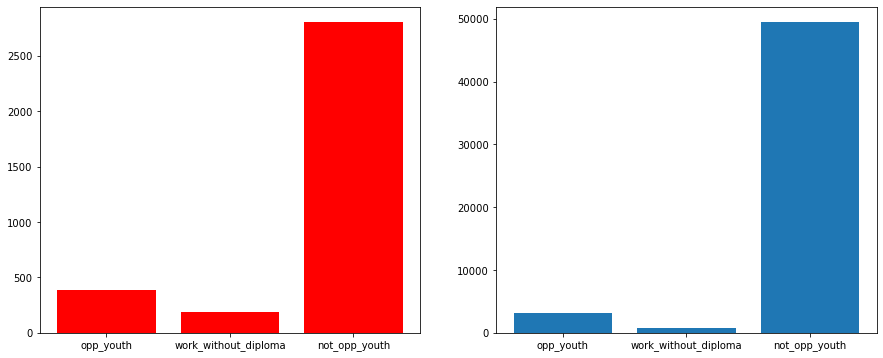

In [137]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(x, y, color='red')
ax2.bar(x,z)
plt.show()